In [1]:
#Basic AstroCV example
#Detect galaxies on a sample image
#
#We provide a pre-compiled version of darknet to run remotely, however
#for local use, you should clone https://github.com/astroCV/darknet
# and you should install https://github.com/astroCV/pyyolo
import pyyolo
import numpy as np
import sys
from PIL import Image, ImageEnhance
import matplotlib.patches as patches
import matplotlib.pyplot as plt
#import PIL.ImageOps  
import time

In [2]:
darknet_path = './data/darknet' #darknet path
datacfg = '../sdss.data' #relative to darknet path
cfgfile = '../sdss.cfg' #relative to darknet path
#weightfile = '/data/astrocv/galaxy_sdss.weights'
weightfile = '/data/astrocv/galaxy_sdss_hic.weights'
#filename = 'data/1140_301_1_206.jpg' #image sample 1
#filename = 'data/1045_301_2_129.jpg' #image sample 2
filename = 'data/hic/1140_301_1_206.jpg' #image sample 1 hi contrast
#filename = 'data/hic/1045_301_2_129.jpg' #image sample 2 hi contrast
thresh = 0.15  #detection threshold
hier_thresh = 0.5

In [3]:
t1=time.time()
pyyolo.init(darknet_path, datacfg, cfgfile, weightfile) #init and load network
print('Initialization time = %5.3f seconds'%(time.time()-t1))
t1=time.time()
outputs = pyyolo.test(filename, thresh, hier_thresh, 0) #load image and process
print('Load from file + Image processing time = %5.3f seconds'%(time.time()-t1))
for output in outputs:
        print(output)
pyyolo.cleanup()

Initialization time = 4.502 seconds
Load from file + Image processing time = 0.525 seconds
{'right': 1980, 'left': 1909, 'class': 'Spiral', 'prob': 0.6312978267669678, 'bottom': 226, 'top': 155}
{'right': 614, 'left': 561, 'class': 'Elliptical ', 'prob': 0.24303647875785828, 'bottom': 316, 'top': 262}
{'right': 778, 'left': 741, 'class': 'Edge-on', 'prob': 0.5935227870941162, 'bottom': 349, 'top': 312}
{'right': 372, 'left': 353, 'class': 'Elliptical ', 'prob': 0.28589704632759094, 'bottom': 620, 'top': 601}
{'right': 840, 'left': 814, 'class': 'Elliptical ', 'prob': 0.5739133358001709, 'bottom': 617, 'top': 592}
{'right': 126, 'left': 104, 'class': 'Elliptical ', 'prob': 0.515967071056366, 'bottom': 827, 'top': 804}
{'right': 1157, 'left': 1114, 'class': 'Elliptical ', 'prob': 0.7146751284599304, 'bottom': 1331, 'top': 1287}
{'right': 1107, 'left': 964, 'class': 'Edge-on', 'prob': 0.6266639828681946, 'bottom': 1139, 'top': 1006}


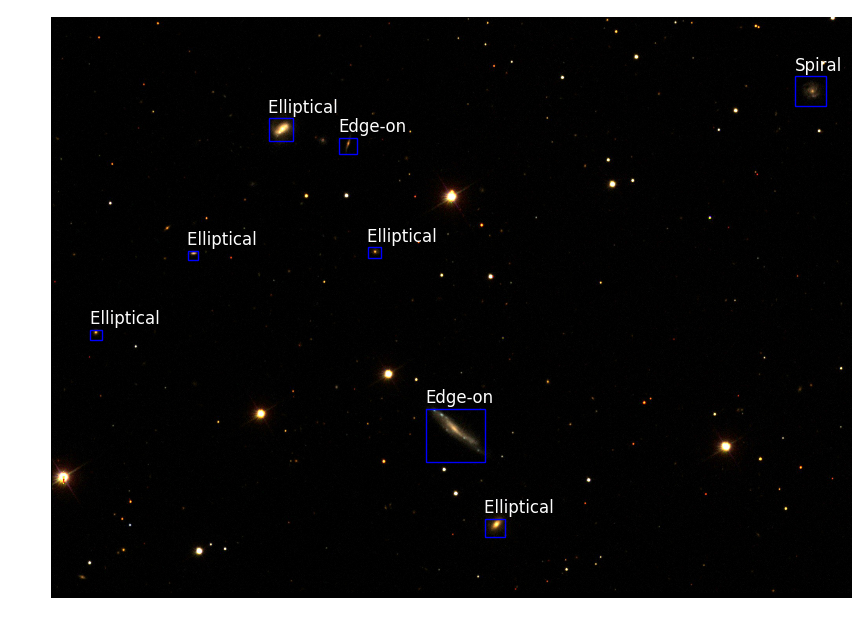

In [4]:
#plot image and detections
img = Image.open(filename)
contrast = ImageEnhance.Contrast(img)
img2 = contrast.enhance(1)
fig,ax = plt.subplots(figsize=(8,6))
plt.axis('off')
plt.tight_layout(pad=0)
plt.imshow(img2)
ax.set_aspect('equal')
for output in outputs:
        r=output['right']
        l=output['left']
        t=output['top']
        b=output['bottom']
        rect = patches.Rectangle((l-4,t-3),r-l+8,b-t+4,linewidth=1,edgecolor='b',facecolor='none')      
        ax.add_patch(rect)
        ax.annotate(output['class'],(l-5,t-17),color='w',fontsize=12)
plt.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=0, hspace=0) 
#plt.savefig('sample.jpg',dpi=220) 
plt.show()

